# 最小二乘法：确定 $Q\sim s$ 曲线类型

常见的 $Q{\sim}s_w$ 曲线类型

- **直线型：** $Q = qs_w$ 
- **抛物线型：** ${s_w} = aQ + b{Q^2}$ 
- **幂函数型：** $Q = q_0 {s_w}^\frac{1}{m}$ 
- **对数型：** $Q=a+b\lg s_w$ 

将常用的 $Q\sim s$ 类型变换为线性形式：

- 直线型： $Q = b s_w$ (不变，要求通过原点）($b>0$)
- 抛物线型： $\frac{s_w}{Q}=a+bQ$，($a>0$)
- 幂函数型： $\lg Q=a+b\lg{s_w}$，（取 $s_w=1$ 可知对 $a$ 符号没有要求）
- 对数型： $Q=a+b\lg s_w$ (不变)，（取 $s_w=1$ 可知  $a>0$ ）

根据最小二乘法原理构造方程组 $X\beta = 𝑌$，
进一步形成方程组 $𝐴\beta = 𝑏$，调用 `numpy.linalg.solve(a, b)` 求解，其中 $𝐴 = X^𝑇X, 𝑏 = X^𝑇𝑌$。分别计算降深误差平方和 $\sum(𝑠 − \hat{s})^2$，最小者为最优。

**练习 1：** 在厚度为 16.50m 的承压含水层中做了 3 次降深的抽水试验，其结果记录在表中。试求 $Q\sim s$ 曲线。


表 1

$r_w(m)$ | $s_1(m)$ | $Q_1(m^3/d)$ | $s_2(m)$ | $Q_2(m^3/d)$ | $s_3(m)$ | $Q_3(m^3/d)$
---------|----------|--------------|----------|--------------|----------|-------------
 0.40 | 1.16 | 320.54 | 1.60 | 421.63 | 1.90 | 536.54



**练习 2：**

某煤矿对太原组含水层四、五灰进行了简易稳定流抽水，抽水量 $(Q)$、抽水井降深 $(s_w)$、抽水井半径 $(r_w)$、含水层厚度 $(M)$ 如表所示。试确定抽水孔的 $Q{\sim}s$ 曲线类型并计算含水水文地质参数。

<center>
表 2

 孔号  | $Q(m^3/d)$ | $s_w(m)$ | $r_w(m)$ | $M(m)$
-------|------------|---------|-----------|-----
 东102 | 133.92     |  54.21  |  0.054  | 26.80
&nbsp; | 125.28     |  44.51  |  0.054  | 26.80
&nbsp; | 116.64     |  35.90  |  0.054  | 26.80
 西 43 | 429.12     |  33.50  |  0.0445 | 34.90
&nbsp; | 495.36     |  40.40  |  0.0445 | 34.90
&nbsp; | 567.36     |  48.50  |  0.0445 | 34.90
</center>

```python
# 练习 1 的数据
Q = np.array([320.54, 421.63, 536.54])
s = np.array([1.16, 1.60, 1.90])
# 练习 2 的东 102 数据
Q = np.array([133.92, 125.28, 116.64])
s = np.array([54.21, 44.51, 35.90])
# 练习 2 的西 43 数据
Q = np.array([429.12, 495.36, 567.364])
s = np.array([33.50, 40.40, 48.50])
```

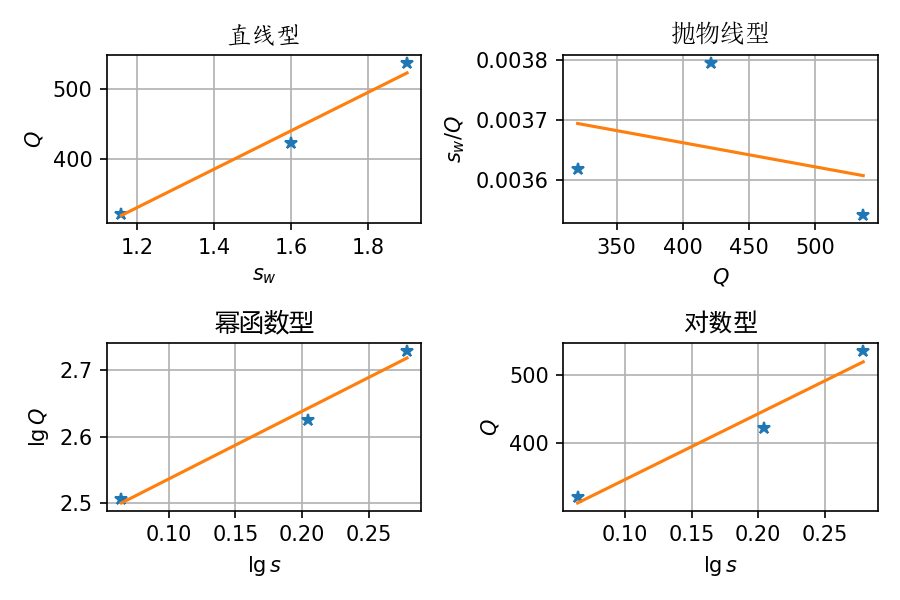

s 误差平方和：
  直线型: beta = 274.8763,  RSS of s = 7.1050e-03
  抛物型: beta = [ 3.8228e-03 -4.0151e-07],  RSS of s = 5.3899e-03
幂函数型: beta = [2.4341 1.0195],  RSS of s = 6.4173e-03
  对数型: beta = [248.9729 971.6074],  RSS of s = 1.5437e-02

Q 误差平方和：
  直线型: beta = 274.8763,  RSS of Q = 5.3684e+02
  抛物型: beta = [ 3.8228e-03 -4.0151e-07],  RSS of s = 4.4838e+02
幂函数型: beta = [2.4341 1.0195],  RSS of s = 5.0247e+02
  对数型: beta = [248.9729 971.6074],  RSS of s = 5.0247e+02


In [1]:
%matplotlib widget

# 导入 numpy 与 matplotlib 库
import numpy as np
import matplotlib.pyplot as plt

# np.set_printoptions( ) 控制显示的小数位, 默认 8 位小数位. 可用 formatter 参数自定义显示的格式
# 例如: np.set_printoptions(formatter={'float': '{:.2f}'.format})
np.set_printoptions(precision=4)

# (Q_i,s_i) 数据
Q = np.array([320.54, 421.63, 536.54])
s = np.array([1.16, 1.60, 1.90])

# 直线型, 直接求解
beta1 = s.dot(Q.T)/s.dot(s.T)

# 抛物线型
# np.vstack 按垂直方向（行顺序）堆叠数组构成一个新的数组
X = np.vstack([np.ones(len(Q)), Q]).T  # 形成系数
beta2 = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, s/Q))

# 幂函数型
X = np.vstack([np.ones(len(Q)), np.log10(s)]).T  # 形成系数
beta3 = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, np.log10(Q)))

# 对数型
X = np.vstack([np.ones(len(Q)), np.log10(s)]).T  # 形成系数
beta4 = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Q))

# Plot the data
fig, axs = plt.subplots(2, 2, figsize=(6, 4), dpi=150)

# 直线型
axs[0,0].plot(s, Q, '*', label="ob")
x = np.linspace(np.min(s),np.max(s), 20)
axs[0,0].plot(x, beta1*x)
# set_title 的 fontdict 参数指定中文字体
axs[0,0].set_title("直线型",fontdict={'family': 'KaiTi'})
axs[0,0].set(xlabel=r'$s_w$', ylabel=r'$Q$')

# 抛物线型
axs[0,1].plot(Q, s/Q, '*')
x = np.linspace(np.min(Q),np.max(Q), 20)
axs[0,1].plot(x, beta2[0]+beta2[1]*x)
axs[0,1].set_title("抛物线型",fontdict={'family': 'SimSun'})
axs[0,1].set(xlabel=r'$Q$', ylabel=r'$s_w/Q$')

# 幂函数型
axs[1,0].plot(np.log10(s), np.log10(Q), '*')
x = np.linspace(np.min(np.log10(s)),np.max(np.log10(s)), 20)
axs[1,0].plot(x, beta3[0]+beta3[1]*x)
axs[1,0].set_title("幂函数型",fontdict={'family': 'Microsoft YaHei'})
axs[1,0].set(xlabel=r'$\lg s$', ylabel=r'$\lg Q$')

# 对数型
axs[1,1].plot(np.log10(s), Q, '*')
x = np.linspace(np.min(np.log10(s)),np.max(np.log10(s)), 20)
axs[1,1].plot(x, beta4[0]+beta4[1]*x)
axs[1,1].set_title("对数型",fontdict={'family': 'SimHei'})
axs[1,1].set(xlabel=r'$\lg s$', ylabel=r'$Q$')

for ax in axs.flat:
    ax.grid()
     
plt.tight_layout()

# gcf() 获取当前图片,  savefig( ) 保存图片
fig = plt.gcf()
fig.savefig("fig2-2.png")

plt.show()

print('s 误差平方和：')
rss = sum((s - Q/beta1)**2)
print('  直线型:','beta = {:.4f},'.format(beta1),' RSS of s = {:.4e}'.format(rss))
rss = sum((s-beta2[0]*Q - beta2[1]*Q**2)**2)
print('  抛物型:','beta = {},'.format(beta2),' RSS of s = {:.4e}'.format(rss))
rss = sum((np.float_power(10, (np.log10(Q) - beta3[0])/beta3[1]) - s)**2)
print('幂函数型:','beta = {},'.format(beta3),' RSS of s = {:.4e}'.format(rss))
rss = sum((np.float_power(10, (Q - beta4[0])/beta4[1]) - s)**2)
print('  对数型:','beta = {},'.format(beta4),' RSS of s = {:.4e}'.format(rss))
print()

print('Q 误差平方和：')
rss = sum((Q - s*beta1)**2)
print('  直线型:','beta = {:.4f},'.format(beta1),' RSS of Q = {:.4e}'.format(rss))
rss = sum(((-beta2[0]+np.sqrt(beta2[0]*beta2[0]+4*beta2[1]*s))/2/beta2[1]-Q)**2)
print('  抛物型:','beta = {},'.format(beta2),' RSS of s = {:.4e}'.format(rss))
rss = sum((np.power(10,beta3[0])*np.power(s,beta3[1])-Q)**2)
print('幂函数型:','beta = {},'.format(beta3),' RSS of s = {:.4e}'.format(rss))
ss = sum((beta4[0]+np.log10(s)*beta4[1]-Q)**2)
print('  对数型:','beta = {},'.format(beta4),' RSS of s = {:.4e}'.format(rss))

**思考题**

(1) 通过比较，抛物线型的 $s$ 或 $Q$ 的误差平方和最小。问该井的 $Q\sim s$ 曲线确定为抛物型是否合适？为什么？

(2) 对比抛物线型的 $Q\sim s$ 与 C. E. Jacob 井损表达式可以看出，它们的形式是一样的。若按上述示例数据计算井损系数 $C$，发现 $C$ 是负值，试分析原因。

(3) 若已知含水层某钻孔的 $Q \sim s$ 类型，问该类型及数据能否用于预测同含水层其它钻孔的降深？